In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate
import numpy as np

In [2]:
def extract_from_df(dataframe, list_of_feature):
    df = pd.DataFrame()
    for i, feature in enumerate(list_of_feature):
        df.insert(i , feature, dataframe[feature])
    return df

def save_pickle(filename, dataframe):
    with open(filename, 'wb') as file:
        pickle.dump(dataframe, file)

In [3]:
filepath_input = 'db_after_notch.json'
list_of_feature = ('signal', 'time', 'age', 'quality', 'bpm')
filepath_output = '/Users/lorenzo/Desktop/PPG/db_ppg.pickle'

In [4]:
raw_df = pd.read_json(filepath_input, orient='index')

df = extract_from_df(raw_df, list_of_feature)

In [5]:
len(df['signal'])

4769

In [6]:
signal_patient = []
quality_threshold = 0.01

In [7]:
df = df[df['quality']<quality_threshold]
df = df.reset_index(drop=True)
#df = df.drop(columns=['quality'])

N_PEOPLE = len(df['signal'])

In [8]:
N_PEOPLE

3613

In [8]:
for patient in range(N_PEOPLE):
    x, y = df['time'][patient], df['signal'][patient]
    tck = interpolate.splrep(x, y)
    min = int(np.ceil(np.min(df['time'][patient])))
    max = int(np.floor(np.max(df['time'][patient])))
    x2 = np.linspace(min, max, 40*(max-min)) 
    # x2 = np.linspace(2, 100, 4000) 
    y_res =  interpolate.splev(x2, tck)
    signal_patient.append(y_res)

In [9]:
df.insert(1, 'new_signal', signal_patient)

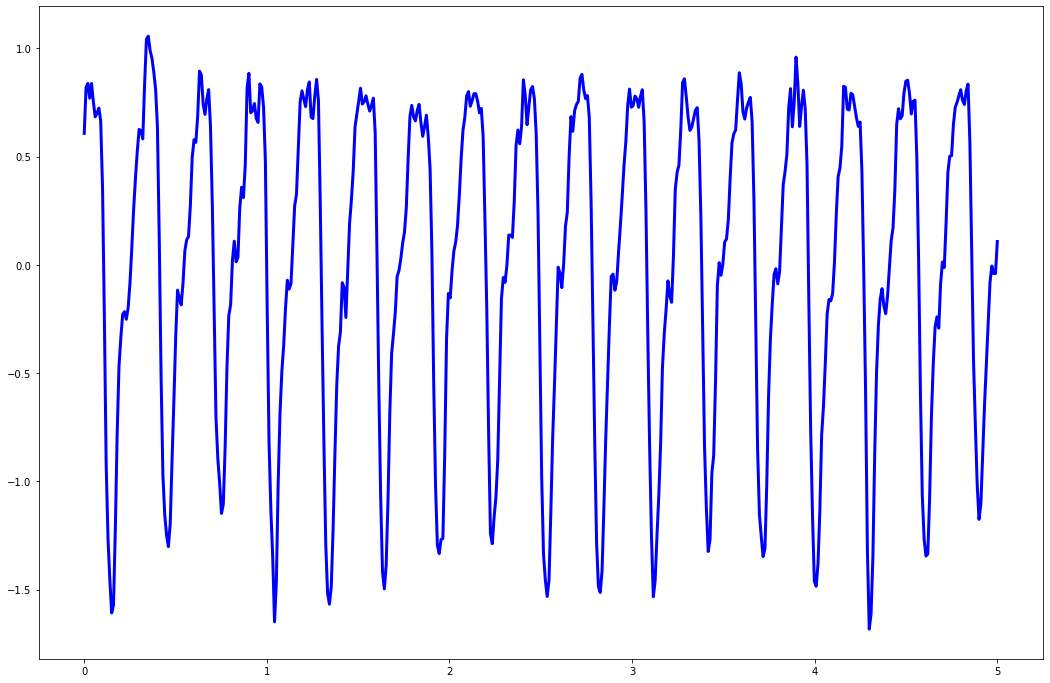

In [10]:
N=2
min, max = int(np.ceil(np.min(df['time'][N]))), int(np.floor(np.max(df['time'][N])))
#x, y = np.linspace(min, max, 40*(max-min)), df['new_signal'][N]
x, y = np.linspace(0, 5, 500), df['new_signal'][N]
plt.figure(figsize=(18, 12))

plt.plot(x, y[0:500], color='blue', linewidth = 3)

#plt.plot(df['time'][0], df['signal'][0], 'o', x, y)
plt.savefig('report/images/ppg_example2.eps')
plt.show()

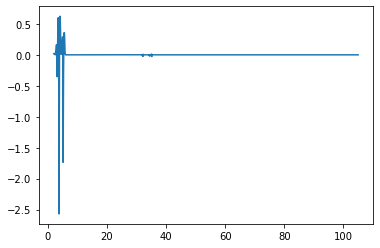

In [11]:
min, max = int(np.ceil(np.min(df['time'][3405]))), int(np.floor(np.max(df['time'][3405])))
x, y = np.linspace(min, max, 40*(max-min)), df['new_signal'][3405]

plt.plot(x, y)
#plt.plot(df['time'][0], df['signal'][0], 'o', x, y)
plt.show()

In [12]:
#df = df.drop(columns=['signal', 'time'])
print(df.head())
print(df.shape)


                                              signal  \
0  [0.0353156732, -0.2131082805, -0.4471490420000...   
1  [-0.0414607595, -0.1896314115, -0.308299108600...   
2  [0.3361460788, 0.44519882580000003, 0.34803389...   
3  [0.7983137258, 0.7215989741000001, 0.605751193...   
4  [0.0836274057, 0.0505192566, 0.021906342500000...   

                                          new_signal  \
0  [-0.02871788200888943, -0.0013873488207403323,...   
1  [-0.10031801687802756, -0.14075968399307495, -...   
2  [0.6068738524029041, 0.819083411603147, 0.8376...   
3  [0.6550265435949243, 0.5700725249011165, 0.534...   
4  [-0.08282955150412087, -0.07285749660769299, -...   

                                                time  age   quality        bpm  
0  [1.432404, 1.464191, 1.499083, 1.530618, 1.564...   68  0.000771  83.487293  
1  [1.4925169999999999, 1.526879, 1.5589309999999...   36  0.000446  61.213567  
2  [1.429406, 1.463605, 1.4982229999999999, 1.533...   61  0.000512  83.428774  
3 

In [13]:
df = df.drop(3405)
df = df.reset_index(drop=True)

In [14]:
df = df[df['quality']<0.005]
df = df.reset_index(drop=True)
#df = df.drop(columns=['quality'])

N_PEOPLE1 = len(df['signal'])

In [16]:
N_PEOPLE1

3256

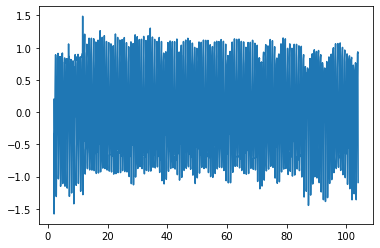

In [15]:
min, max = int(np.ceil(np.min(df['time'][30]))), int(np.floor(np.max(df['time'][30])))
x, y = np.linspace(min, max, 40*(max-min)), df['new_signal'][30]
plt.plot(x, y)
#plt.plot(df['time'][0], df['signal'][0], 'o', x, y)
plt.show()

In [16]:
def build_chunks(arr, chunk_size, axis=1):
     return np.split(arr, 
                     range(chunk_size, arr.shape[axis], chunk_size), axis=axis) 

In [17]:
new_df = pd.DataFrame(columns = ['signal', 'age', 'bpm'])

for patient in range(N_PEOPLE1-1):
    splitted = list(build_chunks(df['new_signal'][patient], 400, axis=0))
    for element in splitted:
        new_df.loc[len(new_df.index)] = [element, int(df['age'][patient]), df['bpm'][patient]]
print(new_df.shape)
print(new_df.head())

(36082, 3)
                                              signal  age        bpm
0  [-0.02871788200888943, -0.0013873488207403323,...   68  83.487293
1  [0.3083950492795603, 0.14706400811896433, 0.30...   68  83.487293
2  [0.6762720193104392, 0.7143931308909828, 0.744...   68  83.487293
3  [-0.18793318808637854, -0.8397484591346106, -1...   68  83.487293
4  [-1.3562696621092105, -1.5620183988558685, -1....   68  83.487293


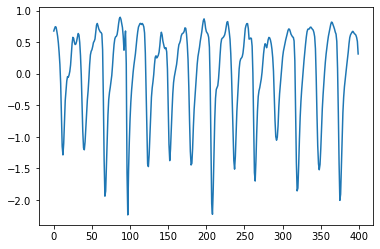

In [18]:
plt.plot(new_df['signal'][2])
plt.show()

In [25]:
c=0
for i in range(32352):
    if len(new_df['signal'][i])!=400:
        c+=1
        #print(len(new_df['signal'][i]))
        new_df = new_df.drop(i)
new_df = new_df.reset_index(drop=True)
print(c)

0


In [26]:
pd.set_option('display.max_rows', None)
print(new_df)

                                                  signal  age         bpm
0      [-0.02871788200888943, -0.0013873488207403323,...   68   83.487293
1      [0.3083950492795603, 0.14706400811896433, 0.30...   68   83.487293
2      [0.6762720193104392, 0.7143931308909828, 0.744...   68   83.487293
3      [-0.18793318808637854, -0.8397484591346106, -1...   68   83.487293
4      [-1.3562696621092105, -1.5620183988558685, -1....   68   83.487293
5      [-1.4524424661847677, -1.7706544000541717, -1....   68   83.487293
6      [-1.6027536218412763, -1.3800861512787235, -1....   68   83.487293
7      [-1.074544834118227, -0.7716918563780684, -0.4...   68   83.487293
8      [-0.5392766487288164, -0.3476527849089586, -0....   68   83.487293
9      [-1.1492569934724277, -0.9887194670612146, -0....   68   83.487293
10     [-0.10031801687802756, -0.14075968399307495, -...   36   61.213567
11     [-1.4028304430004692, -1.3203027319922542, -1....   36   61.213567
12     [0.18012512419926766, 0.3659038

In [103]:
# new_df = pd.DataFrame(columns = ['signal', 'age'])

# for patient in range(N_PEOPLE1-1):
#     splitted = list(np.array_split(df['new_signal'][patient], 10)) #da cambiare 
#     for element in splitted:
#         new_df.loc[len(new_df.index)] = [element, int(df['age'][patient])]

# print(new_df.shape)
# print(new_df.head())

(32550, 2)
                                              signal  age
0  [-0.02871788200888943, -0.0013873488207403323,...   68
1  [-0.4676066099617788, -0.6755885240455002, -0....   68
2  [0.47835313580984923, 0.5759019589635093, 0.56...   68
3  [-0.3748441214685049, -0.17321048378541348, -0...   68
4  [0.6812330037442011, 0.6625667729950552, 0.649...   68


In [28]:
c=0
for i in range(32838):
    if len(new_df['signal'][i])!=400:
        c+=1
        print(len(new_df['signal'][i]))
        
#new_df = new_df.reset_index(drop=True)
print(c)

0


Salva il dataframe in formato pickle

In [30]:
save_pickle(filepath_output, new_df)